In [ ]:
import sys, os
sys.path.append(os.path.abspath(".."))
sys.path.append(os.path.abspath("../src"))


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.data.load_data import load_olist_raw
from src.data.preprocess import merge_olist_tables
from src.data.construct_treatment import create_treatment


In [2]:
df_raw = load_olist_raw()

Loaded: orders — (99441, 8)
Loaded: order_items — (112650, 7)
Loaded: order_payments — (103886, 5)
Loaded: order_reviews — (99224, 7)
Loaded: products — (32951, 9)
Loaded: sellers — (3095, 4)
Loaded: customers — (99441, 5)


In [3]:
df = merge_olist_tables(df_raw)
df.head()

Merged dataset shape: (114092, 17)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_value,payment_type,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,38.71,credit_card,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,141.46,boleto,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,179.12,credit_card,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,72.20,credit_card,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,28.62,credit_card,5.0


In [4]:
df = create_treatment(df)
df[['late_delivery', 'actual_delivery_days', 'estimated_delivery_days']].head()

,late_delivery,actual_delivery_days,estimated_delivery_days
0,0,8.0,15
1,0,13.0,19
2,0,9.0,26
3,0,13.0,26
4,0,2.0,12


In [6]:
# Save Intermediate Version
df.to_csv("../data/interim/orders_merged.csv", index=False)

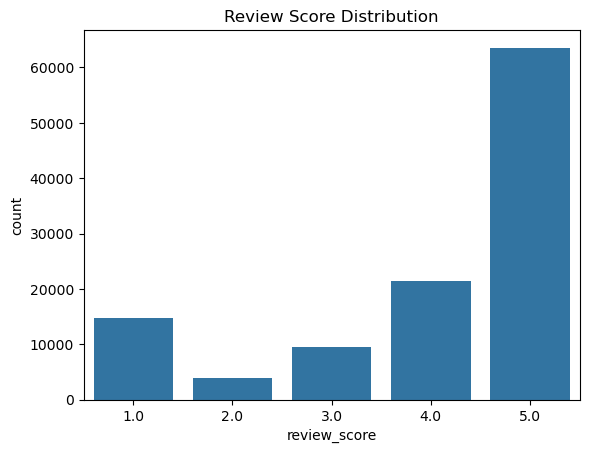

In [8]:
# Distribution of review scores
sns.countplot(x="review_score", data=df)
plt.title("Review Score Distribution")
plt.show()


In [9]:
# Delivery delay rate
df["late_delivery"].mean()

np.float64(0.07674508291554184)

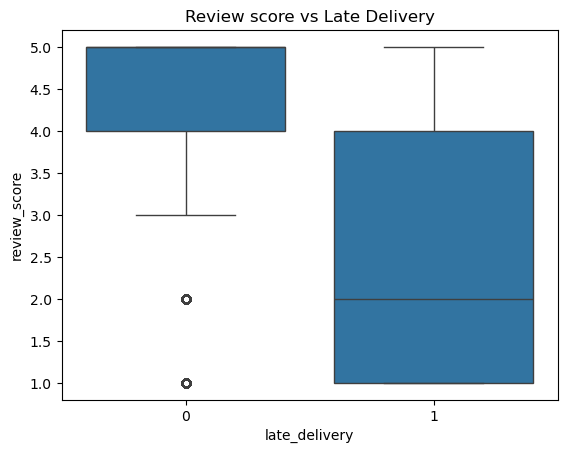

In [10]:
sns.boxplot(x="late_delivery", y="review_score", data=df)
plt.title("Review score vs Late Delivery")
plt.show()